In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.special import ellipk, ellipkinc

C:\Users\Mohan Raj A\AppData\Local\Temp\ipykernel_14468\2718618394.py:36: RuntimeWarning: invalid value encountered in subtract
  lhs = (K_k - K_sigma0_k)**2
C:\Users\Mohan Raj A\AppData\Local\Temp\ipykernel_14468\2718618394.py:52: RuntimeWarning: divide by zero encountered in scalar divide
  derivatives[i] = (theta_total_values[i + 1] - theta_total_values[i - 1]) / (alpha_values[i + 1] - alpha_values[i - 1])
c:\Users\Mohan Raj A\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\Mohan Raj A\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\Mohan Raj A\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\Mohan Raj A\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1243: Run

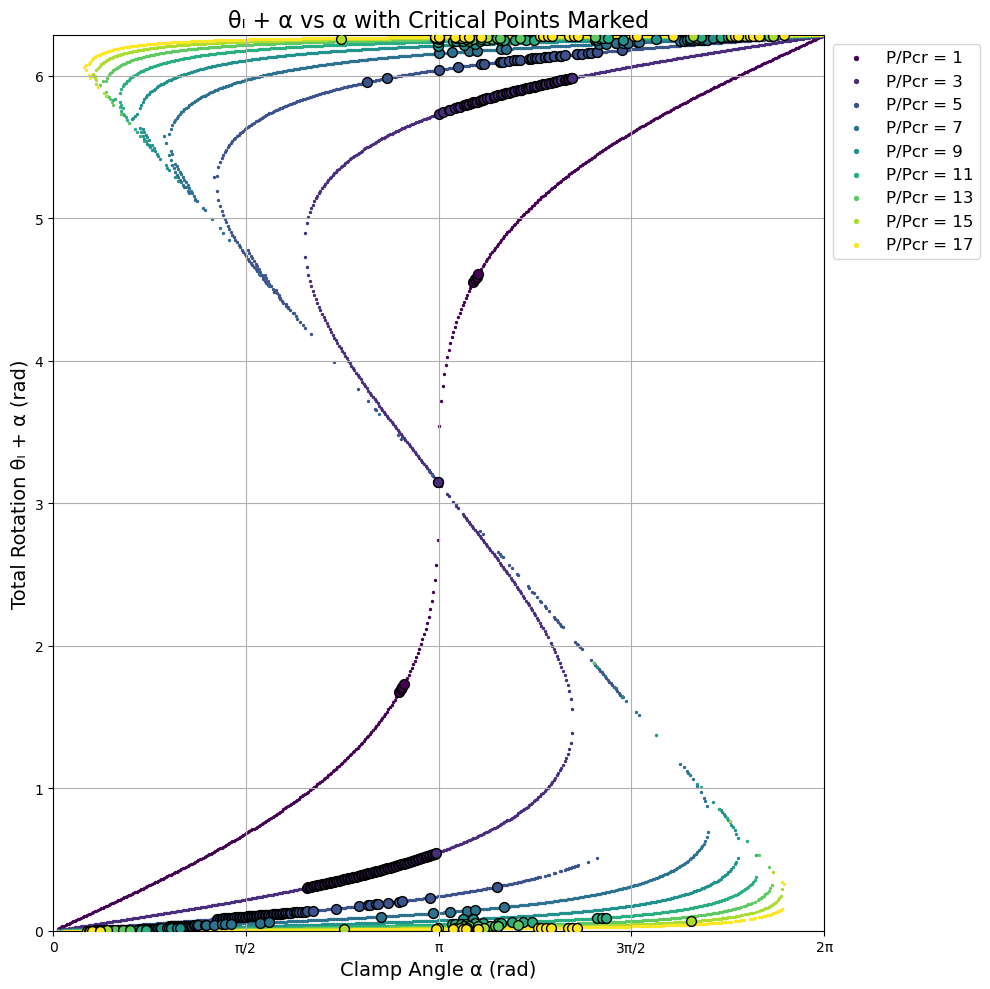

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.special import ellipk, ellipkinc

B = 1.0
l = 1.0
pi_sq_over_4 = (B * np.pi**2) / (4 * l**2)
P_cr = pi_sq_over_4
P_over_Pcr_values = np.arange(1, 18, 2)
num_alpha = 500
alphas = np.linspace(0, 2 * np.pi, num_alpha)
initial_guesses = np.linspace(0, 2 * np.pi, 200)

def equilibrium_condition(theta_l, alpha, P_over_Pcr):
    lambda_sq = pi_sq_over_4 * P_over_Pcr
    k = np.sin((theta_l + alpha - np.pi) / 2)
    if np.abs(k) > 1:
        return 1e6
    term = (1 / k) * np.sin((alpha - np.pi) / 2)
    if np.abs(term) > 1:
        return 1e6
    sigma0 = np.arcsin(term)
    K_k = ellipk(k**2)
    K_sigma0_k = ellipkinc(sigma0, k**2)
    lhs = (K_k - K_sigma0_k)**2
    P_normalized = P_over_Pcr * P_cr
    return lhs - P_normalized

tolerance = 1e-4

def find_unique_roots(theta_solutions, tol=tolerance):
    unique_solutions = []
    for sol in theta_solutions:
        if not any(np.isclose(sol, uniq, atol=tol) for uniq in unique_solutions):
            unique_solutions.append(sol)
    return unique_solutions

def compute_finite_difference(alpha_values, theta_total_values):
    derivatives = np.zeros(len(alpha_values))
    for i in range(1, len(alpha_values) - 1):
        derivatives[i] = (theta_total_values[i + 1] - theta_total_values[i - 1]) / (alpha_values[i + 1] - alpha_values[i - 1])
    derivatives[0] = (theta_total_values[1] - theta_total_values[0]) / (alpha_values[1] - alpha_values[0])
    derivatives[-1] = (theta_total_values[-1] - theta_total_values[-2]) / (alpha_values[-1] - alpha_values[-2])
    return derivatives

plt.figure(figsize=(10, 10))
colors = plt.cm.viridis(np.linspace(0, 1, len(P_over_Pcr_values)))

critical_points = {}

for idx, P_over_Pcr in enumerate(P_over_Pcr_values):
    theta_total_plot = []
    alpha_plot = []
    critical_alpha = []
    for alpha in alphas:
        theta_solutions = []
        for guess in initial_guesses:
            theta_l_solution, info, ier, mesg = fsolve(equilibrium_condition, guess, args=(alpha, P_over_Pcr), full_output=True)
            if ier == 1:
                theta_l = theta_l_solution[0]
                theta_solutions.append(theta_l)
        unique_solutions = find_unique_roots(theta_solutions)
        for theta_l in unique_solutions:
            theta_total = theta_l + alpha
            if 0 <= theta_total <= 2 * np.pi:
                theta_total_plot.append(theta_total)
                alpha_plot.append(alpha)
    alpha_plot = np.array(alpha_plot)
    theta_total_plot = np.array(theta_total_plot)
    dtheta_dalpha = compute_finite_difference(alpha_plot, theta_total_plot)
    for i in range(1, len(dtheta_dalpha) - 1):
        if np.sign(dtheta_dalpha[i - 1]) != np.sign(dtheta_dalpha[i + 1]) == 1:
            critical_alpha.append(alpha_plot[i])
    dtheta_dalpha = np.gradient(theta_total_plot, alpha_plot)
    for i in range(len(dtheta_dalpha) - 1):
        if np.isclose(dtheta_dalpha[i], np.pi / 2, atol=1e-1):
            critical_alpha.append(alpha_plot[i])
    critical_points[P_over_Pcr] = critical_alpha
    critical_y = [theta_total_plot[np.abs(alpha_plot - ca).argmin()] for ca in critical_alpha]
    plt.scatter(alpha_plot, theta_total_plot, s=2, color=colors[idx], label=f'P/Pcr = {P_over_Pcr}')
    plt.scatter(critical_alpha, critical_y, color=colors[idx], s=50, edgecolor='black', zorder=5)

plt.xlabel('Clamp Angle α (rad)', fontsize=14)
plt.ylabel('Total Rotation θₗ + α (rad)', fontsize=14)
plt.title('θₗ + α vs α with Critical Points Marked', fontsize=16)
plt.legend(fontsize=12, markerscale=2, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xlim(0, 2 * np.pi)
plt.ylim(0, 2 * np.pi)
plt.xticks([0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi], ['0', 'π/2', 'π', '3π/2', '2π'])
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 10))
colors = plt.cm.viridis(np.linspace(0, 1, len(P_over_Pcr_values)))
P_over_Pcr_values = np.arange(1, 18, 2)
slope_angles = {}
vertical_slopes = {}
nan_alpha_values = {}
PbyP_cr = []
alpha_s = []

for idx, P_over_Pcr in enumerate(P_over_Pcr_values):
    theta_total_plot = []
    alpha_plot = []
    
    for alpha in alphas:
        theta_solutions = []
        for guess in initial_guesses:
            try:
                theta_l_solution, info, ier, mesg = fsolve(equilibrium_condition, guess, args=(alpha, P_over_Pcr), full_output=True)
                if ier == 1:
                    theta_l = theta_l_solution[0]
                    theta_solutions.append(theta_l)
            except Exception:
                continue
        
        unique_solutions = find_unique_roots(theta_solutions)
        for theta_l in unique_solutions:
            theta_total = theta_l + alpha
            if 0 <= theta_total <= 2 * np.pi:
                theta_total_plot.append(theta_total)
                alpha_plot.append(alpha)
    
    alpha_plot = np.array(alpha_plot)
    theta_total_plot = np.array(theta_total_plot)
    
    slopes = np.gradient(theta_total_plot, alpha_plot)
    slope_angles[P_over_Pcr] = slopes

    nan_indices = np.isnan(slopes)
    if np.any(nan_indices):
        nan_alphas = alpha_plot[nan_indices]
        nan_alpha_values[P_over_Pcr] = alpha_plot[nan_indices]
    
    first_nan_alphas = {P_over_Pcr: alphas[0] for P_over_Pcr, alphas in nan_alpha_values.items() if len(alphas) > 0}
    P_over_Pcr_list = list(first_nan_alphas.keys())
    first_nan_alpha_list = list((2 * np.pi - np.array(list(first_nan_alphas.values()))) / np.pi)
    PbyP_cr = P_over_Pcr_list
    alpha_s = first_nan_alpha_list
    print(P_over_Pcr_list, first_nan_alpha_list)


C:\Users\Mohan Raj A\AppData\Local\Temp\ipykernel_14468\2718618394.py:36: RuntimeWarning: invalid value encountered in subtract
  lhs = (K_k - K_sigma0_k)**2


[] []


c:\Users\Mohan Raj A\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\Mohan Raj A\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\Mohan Raj A\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\Mohan Raj A\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1243: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\Mohan Raj A\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\Mohan Raj A\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1244: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))

[3] [1.346693386773547]
[3, 5] [1.346693386773547, 1.5831663326653307]
[3, 5, 7] [1.346693386773547, 1.5831663326653307, 1.711422845691383]
[3, 5, 7, 9] [1.346693386773547, 1.5831663326653307, 1.711422845691383, 1.7955911823647295]
[3, 5, 7, 9, 11] [1.346693386773547, 1.5831663326653307, 1.711422845691383, 1.7955911823647295, 1.843687374749499]
[3, 5, 7, 9, 11, 13] [1.346693386773547, 1.5831663326653307, 1.711422845691383, 1.7955911823647295, 1.843687374749499, 1.8797595190380763]
[3, 5, 7, 9, 11, 13, 15] [1.346693386773547, 1.5831663326653307, 1.711422845691383, 1.7955911823647295, 1.843687374749499, 1.8797595190380763, 1.899799599198397]
[3, 5, 7, 9, 11, 13, 15, 17] [1.346693386773547, 1.5831663326653307, 1.711422845691383, 1.7955911823647295, 1.843687374749499, 1.8797595190380763, 1.899799599198397, 1.9198396793587174]


<Figure size 1000x1000 with 0 Axes>

In [ ]:
P_over_Pcr_values = [3, 5, 7, 9, 11, 13, 15, 17]
alpha_midpoints = [1.346693386773547, 1.5831663326653307, 1.711422845691383, 
                   1.7955911823647295, 1.843687374749499, 1.8797595190380763, 
                   1.899799599198397, 1.9198396793587174]

for P_over_Pcr, alpha_mid in zip(P_over_Pcr_values, alpha_midpoints):
    alpha_range = np.linspace((alpha_mid - 0.02) * np.pi, (alpha_mid + 0.02) * np.pi, 1500)
    distinct_set_counts = []
    
    for alpha in alpha_range:
        distinct_sets = set()
        theta_solutions = []

        # Solve for theta_l using multiple initial guesses
        for guess in initial_guesses:
            theta_l_solution, info, ier, mesg = fsolve(
                equilibrium_condition,
                guess,
                args=(alpha, P_over_Pcr),
                full_output=True
            )
            if ier == 1:
                theta_l = theta_l_solution[0]
                theta_solutions.append(theta_l)
        
        # Compute unique solutions for theta_l
        unique_solutions = list(set(np.round(theta_solutions, decimals=5)))

        # Compute (σ₀, λ, k) for each unique solution
        for theta_l in unique_solutions:
            k = np.sin((theta_l + alpha - np.pi) / 2)
            term = (1 / k) * np.sin((alpha - np.pi) / 2)
            sigma0 = np.arcsin(np.clip(term, -1, 1))
            lambda_val = np.sqrt(P_over_Pcr * pi_sq_over_4 / B)
            distinct_sets.add((round(sigma0, 5), round(lambda_val, 5), round(k, 5)))

        # Store the count of distinct sets
        distinct_set_counts.append(len(distinct_sets))
    
    # Find the first alpha where the count transitions from 2 solutions to 1 solution
    transition_index = next(
        (i for i in range(1, len(distinct_set_counts)) 
         if distinct_set_counts[i - 1] == 2 and distinct_set_counts[i] == 1),
        None
    )
    
    if transition_index is not None:
        alpha_transition = alpha_range[transition_index]
        alpha_divided_by_pi = alpha_transition / np.pi
        print(f"P/Pcr = {P_over_Pcr}: Transition from 2 to 1 solutions at alpha ≈ {alpha_transition:.5f} rad")
        print(f"P/Pcr = {P_over_Pcr}: Alpha/π ≈ {alpha_divided_by_pi:.5f}")
    else:
        print(f"P/Pcr = {P_over_Pcr}: No transition from 2 to 1 solutions found in the given range.")


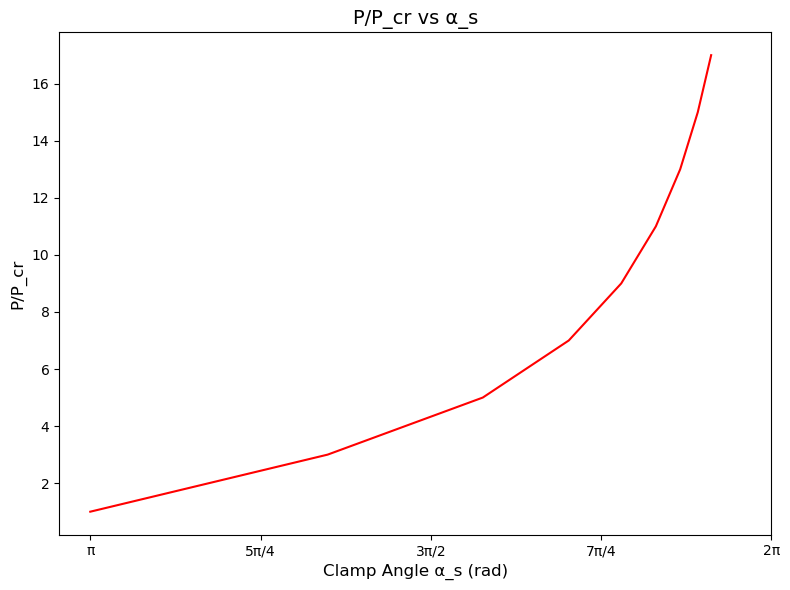

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


alpha_s_values = np.array([1,1.34849, 1.57630, 1.70252, 1.77957, 1.83039, 1.86611, 1.89194, 1.91158]) * np.pi
P_over_Pcr_values = [1,3, 5, 7, 9, 11, 13, 15, 17]

plt.figure(figsize=(8, 6))


plt.plot(alpha_s_values, P_over_Pcr_values, color='red', label='Data Points', zorder=5)



pi_ticks = [np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi]
pi_labels = ['π', '5π/4', '3π/2', '7π/4', '2π']
plt.xticks(pi_ticks, pi_labels)

plt.xlabel('Clamp Angle α_s (rad)', fontsize=12)
plt.ylabel('P/P_cr', fontsize=12)
plt.title('P/P_cr vs α_s', fontsize=14)

plt.tight_layout()
plt.savefig('Fig3.pdf')

plt.show()
